### Comparison of Marital Status and Test Scores

In [3]:
# import modules
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [5]:
#Create the Path and a DataFrame
csvpath = Path("../Data/CleanedSchoolData.csv")
Data = pd.read_csv(csvpath)
Data.head()

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Average Score
0,female,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0
2,female,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0
4,male,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0


## Box Plot of Parent Education and Test Scores


In [32]:
#Describe Data
Data.groupby("ParentMaritalStatus")["Average Score"].describe()

,count,mean,std,min,25%,50%,75%,max
ParentMaritalStatus,,,,,,,,
divorced,4919.0,68.380972,14.521569,10.0,58.0,68.0,79.0,100.0
married,16844.0,68.155248,14.431619,16.0,58.0,68.0,79.0,100.0
single,7097.0,67.830210,14.428704,9.0,58.0,68.0,78.0,100.0
widowed,591.0,68.526227,14.394758,20.0,58.0,68.0,80.0,99.0


<Axes: title={'center': 'Average Score'}, xlabel='ParentMaritalStatus'>

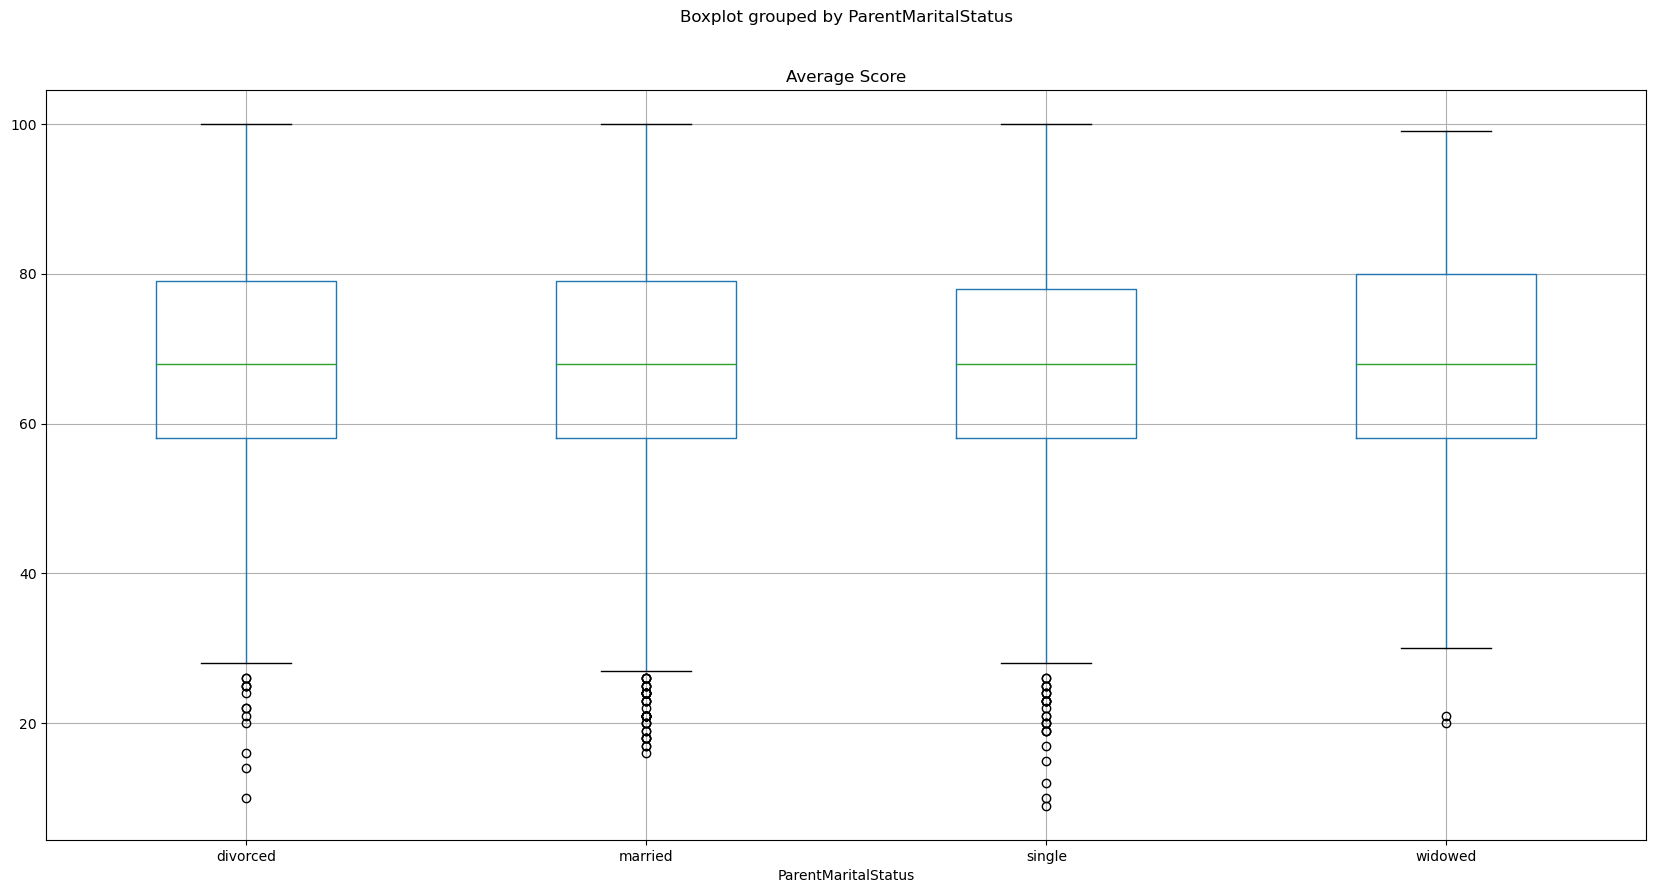

In [25]:
# Box plot of different marital status scores
Data.boxplot("Average Score", by="ParentMaritalStatus", figsize=(20, 10),)

In [27]:
#Test statistical Significance of the groups
divorced = Data.loc[Data["ParentMaritalStatus"] == "divorced"]["Average Score"]
married = Data.loc[Data["ParentMaritalStatus"] == "married"]["Average Score"]
single = Data.loc[Data["ParentMaritalStatus"] == "single"]["Average Score"]
widowed = Data.loc[Data["ParentMaritalStatus"] == "widowed"]["Average Score"]
stats.f_oneway(divorced, married, single, widowed)

F_onewayResult(statistic=1.6762705167648146, pvalue=0.16972443726584271)